# Play with Data

In [ ]:
library(MuData)
library(SummarizedExperiment)

In [212]:
library(dplyr)
library(ggplot2)
library(tibble)
library(stringr)

Warning message:
“package ‘stringr’ was built under R version 4.3.2”


In [3]:
inference_data_path <- "/mnt/shared/inference"

In [5]:
mudata_input_fp <- paste0(inference_data_path, "/gasperini_inference_input_minimal.h5mu")
input_minimal <- readH5MU(mudata_input_fp)
input_minimal

Warning message:
“sampleMap[['assay']] coerced with as.factor()”


A MultiAssayExperiment object of 2 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 2:
 [1] gene: SummarizedExperiment with 112 rows and 9704 columns
 [2] guide: SummarizedExperiment with 55 rows and 9704 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

In [6]:
input_minimal[['gene']]

class: SummarizedExperiment 
dim: 112 9704 
metadata(0):
assays(1): ''
rownames(112): ENSG00000008853 ENSG00000104679 ... ENSG00000198899
  ENSG00000228253
rowData names(0):
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [77]:
assayNames(input_minimal[['gene']]) <- 'counts'
input_minimal[['gene']]

class: SummarizedExperiment 
dim: 112 9704 
metadata(0):
assays(1): counts
rownames(112): ENSG00000008853 ENSG00000104679 ... ENSG00000198899
  ENSG00000228253
rowData names(0):
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [68]:
assay(input_minimal[['gene']], 'counts')[1:3,1:3]

3 x 3 sparse Matrix of class "dgCMatrix"
                GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                2
ENSG00000104689                                .
                AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                2
                CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                1
ENSG00000104689                                .

In [78]:
guide_data <- rowData(input_minimal[['guide']])
#dim(guide_data)
#head(guide_data)

nontarg_guides <- data.frame(guide_data) %>%
filter(targeting==FALSE) %>%
row.names()

nontarg_guides

[1] "GACCTCCTGTGATCAGGTGG" "ATTGGTATCCGTATAAGCAG" "TCTAATCTCAGCTACTTGGG"
 [4] "AGATACCTATGGCCATATAG" "GTAGCTTTATGAGAACCACT" "AATATTCTCCCTCATTCTGG"
 [7] "TATCTCAGAGTACTATTCCA" "GCGAACAGCGAGGGCCCCTG" "TGTTGTGAGAGCATCCGGAG"
[10] "GCAAATGCTTCATCACCCCA" "ATTGGCAGTCTCTAAGAAGT" "TCCGCAGTCAAAAGACCGAG"
[13] "CGAAGGATCAAAGCGACTTT" "AGTTCTAGAGCACTGAGCAA" "AATCATGGTGGAAGGTGAAG"
[16] "CCATAAAGAATTCGGTGTAG" "TCTGCTAAACTGCCTACACA" "TCTTGGCCTGCTTGGTGTCT"
[19] "GGGGACTTGCTCCAGGACGG" "CGAGTTGTAAGCCCTTAAAA" "TGAACAATACTCCAGTACAT"
[22] "CCACCTTCGAAGTCCGTATG" "GTAGCCTCTGTTCCTCAGTA" "AATCCTCTAATGGACGAAGA"
[25] "ATATTCAGCAGCTAAAGCAT"

In [82]:
assayNames(input_minimal[['guide']])[[1]] <- 'counts'
input_minimal[['guide']]

class: SummarizedExperiment 
dim: 55 9704 
metadata(2): capture_method moi
assays(2): counts guide_assignment
rownames(55): ATGTAGAAGGAGACACCGGG GCGCAGAGGCGGATGTAGAG ...
  AATCCTCTAATGGACGAAGA ATATTCAGCAGCTAAAGCAT
rowData names(2): targeting intended_target_name
colnames(9704): GCTTGAATCGAATGCT-1_1B_1_SI-GA-F2
  AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3 ... GGATTACCATGTTGAC-1_2A_4_SI-GA-G5
  GTGCTTCTCGGATGTT-1_2A_1_SI-GA-G2
colData names(0):

In [93]:
#get the cell IDs that got a certain guide
grna_ids <- nontarg_guides
sparse_guide_matrix <- assay(input_minimal[['guide']], 'counts')[grna_ids, ]

# Compute column sums
col_sums <- colSums(sparse_guide_matrix)

# Identify columns with non-zero sum
columns_with_nonzero <- names(col_sums[col_sums > 0])
length(columns_with_nonzero)

#non-targeting gRNA expression matrix
nontargeting_mat <- assay(input_minimal[['gene']], 'counts')[, columns_with_nonzero]
dim(nontargeting_mat)
nontargeting_mat[1:3, 1:3]

[1] 4237

[1]  112 4237

3 x 3 sparse Matrix of class "dgCMatrix"
                CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2
ENSG00000008853                                .
ENSG00000104679                                1
ENSG00000104689                                .
                GGACGTCTCATGTCTT-1_1B_8_SI-GA-F9
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                .
                CACTCCAAGCGTAGTG-1_1A_2_SI-GA-E3
ENSG00000008853                                .
ENSG00000104679                                .
ENSG00000104689                                .

In [216]:
## get gRNA that made it into each cell
sparse_guide_matrix <- assay(input_minimal[['guide']], 'counts')

# Find the rowname with the maximum number of reads for each column (sample barcode)
max_rownames <- rownames(sparse_guide_matrix)[apply(sparse_guide_matrix, 2, which.max)]

# Find the maximum number of reads for each column (sample barcode)
max_reads <- apply(sparse_guide_matrix, 2, max)

# Create a dataframe with sample barcode IDs, corresponding rownames with max reads, and max reads
max_guide_reads_df <- data.frame(
  BarcodeID = colnames(sparse_guide_matrix),
  MaxGuideRow = max_rownames,
  MaxGuideReads = max_reads
)

## project PCs into non-targeting PCA space
# Run PCA
non_targ_pca_result <- prcomp(t(as.matrix(nontargeting_mat)))
loadings <- non_targ_pca_result$rotation[, 1:20]

#project full matrix onto non-targ PCA space
full_matrix <- t(assay(input_minimal[['gene']], 'counts'))
projected_data <- full_matrix %*% loadings

plot_pc_data <- as.data.frame(as.matrix(projected_data)) %>%
mutate(BarcodeID = rownames(.))
            
join_guide_data <- as.data.frame(guide_data) %>%
mutate(MaxGuideRow = rownames(.))


## join the PC result with the gRNA
plot_pc_data <- plot_pc_data %>%
left_join(max_guide_reads_df) %>%
left_join(join_guide_data) %>%
mutate(target_type = 
      case_when(
          str_starts(intended_target_name, "ENSG") ~ "gene",
          str_detect(intended_target_name, "non-targeting") ~ "non-targeting",
          TRUE ~ "other"
      )
      ) %>%
filter(MaxGuideReads >= 10)

## Look at the DF
head(plot_pc_data)

Joining with `by = join_by(BarcodeID)`
Joining with `by = join_by(MaxGuideRow)`


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC17,PC18,PC19,PC20,BarcodeID,MaxGuideRow,MaxGuideReads,targeting,intended_target_name,target_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,77.77409,-8.901154,-13.037008,-3.556483,2.305615,-1.182569,-0.7650674,0.06369605,3.487388,1.0260964,⋯,1.6681571,-3.085109677,-1.8723367,1.777071,AGCTTGATCGAGAGCA-1_1A_2_SI-GA-E3,GAGAGAGCCGGCGGCCAGTG,18,TRUE,ENSG00000163866,gene
2,365.16365,-73.947723,-47.138124,-5.855877,9.061046,-25.370707,23.9535865,17.77219083,-5.447097,3.9015997,⋯,3.3325394,0.443033052,0.4478279,-1.782388,CCCAATCTCCTCAATT-1_1B_1_SI-GA-F2,AATCCTCTAATGGACGAAGA,24,FALSE,non-targeting,non-targeting
3,64.16726,-4.912130,-31.603548,-3.604337,4.871304,1.224124,1.6767495,2.43258329,2.055070,-14.1449185,⋯,0.6553941,0.001307675,-0.9617790,0.681225,CGCGGTACACTGTCGG-1_1A_2_SI-GA-E3,CGGAAGTCGCCGCACCCAGG,26,TRUE,ENSG00000163866,gene
4,113.23009,-29.472270,-13.533117,-7.976100,9.003279,-3.809056,-0.7917406,-5.98594848,-1.088634,0.3977529,⋯,2.6948700,2.795633502,-0.3526482,1.584433,GGACGTCTCATGTCTT-1_1B_8_SI-GA-F9,TATCTCAGAGTACTATTCCA,12,FALSE,non-targeting,non-targeting
5,101.99982,-13.918431,-4.579802,-2.878700,1.993591,2.160560,-2.0184292,0.23977561,2.699963,-3.3675598,⋯,1.4622445,0.166128470,0.7467622,2.594467,TCAGCTCTCCTAGGGC-1_1B_6_SI-GA-F7,TGCCGGGCGAGCACCGTTAG,34,TRUE,ENSG00000122644,gene
6,103.78614,-4.270696,-31.319607,8.294117,1.873912,-4.523433,5.7228021,-8.89167980,-2.140922,0.6603452,⋯,1.4295445,2.308564867,2.0680726,1.226013,AGTGAGGTCCGTACAA-1_1A_2_SI-GA-E3,ACCCAGACTCCAGATCGGGG,24,TRUE,ENSG00000122644,gene


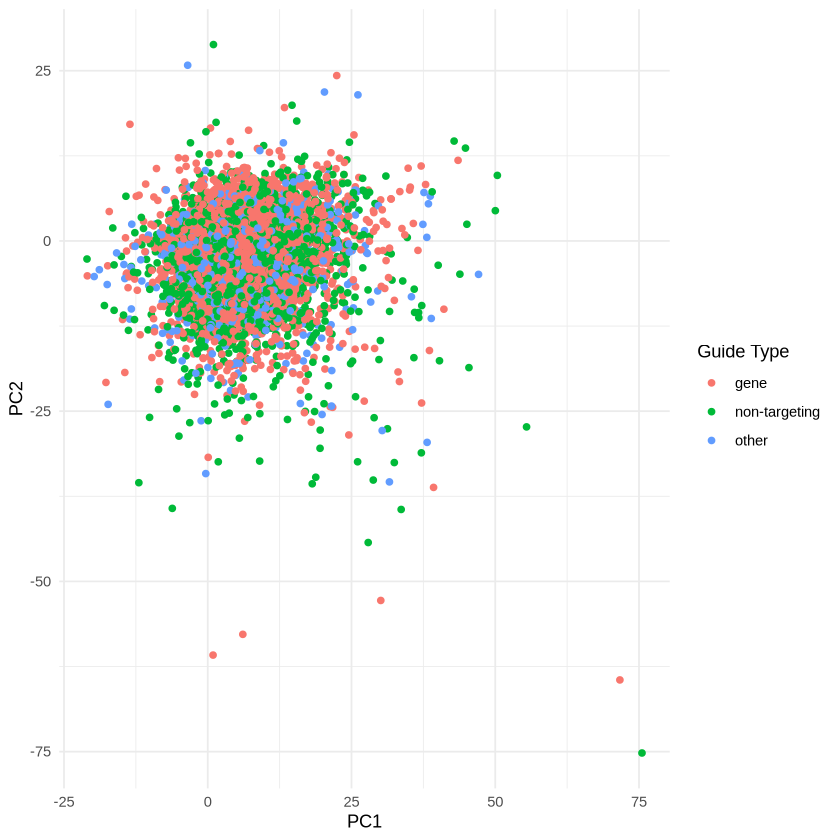

In [220]:
ggplot(plot_pc_data, aes(x = PC5, y = PC6, color = target_type)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", color = "Guide Type") +
  theme_minimal()